<font size= "5"> Introduction  </font>  
In this kernel, we are going to predict whether a credit card is fraud or not using Machine Learning.  
  
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in  two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds)  account for 0.172% of  all transactions.  
   
Due to confidentiality issues, the input variables are transformed into numerical using PCA transformations.  

<font size="5">Importing the required python libraries </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

<font size="5"> Data Preprocessing </font>   
Let's get the dataset into a pandas dataframe.

In [2]:
data = pd.read_csv('creditcard.csv')
df = data.copy() # To keep the data as backup
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#descriptive statistics
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

<font size = "5"> What is the dimensionality of the data? </font>     
<font size = "3"> We have 284807 transcations and 30 features with 1 being the output class </font>

In [5]:
df.shape

(284807, 31)

<font size = "5"> Are there any missing values? </font>   
<font size = "3"> No missing value </font>

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<font size = "5"> What is the class distribution? </font>    

In [7]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [8]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [9]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

We can see that there is only 0.17% frauds. We will take care of the class imbalance later.

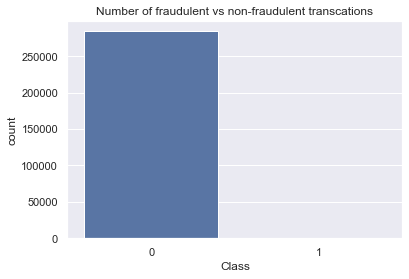

In [10]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

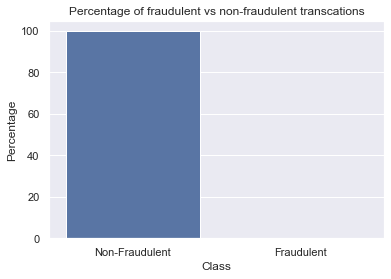

In [11]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

<font size = "5"> Outliers treatment </font>    
We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the  outlier values are taken care while transforming the data.  

<font size = "5"> Checking the distribution of amount </font>

In [12]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

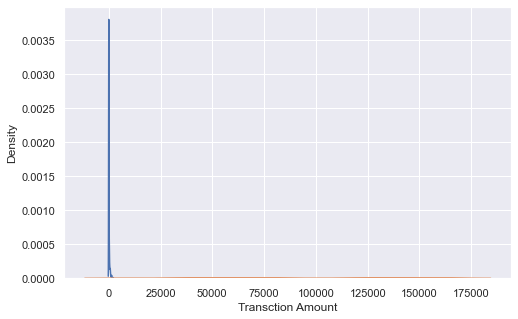

In [13]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

Analysis:   
We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded   throughout low to high range of amount.    
Since its a bit difficult to see. Let's engineer the features of bins

In [14]:
df['Amount-Bins'] = ''

Now, let's set the bins and their labels.

In [15]:
def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bin_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    
    return bins, bin_labels

In [16]:
bins, bin_labels = make_bins(df.Amount, size=10)

Now, adding bins in the column Amount-Bins.

In [17]:
df['Amount-Bins'] = pd.cut(df.Amount, bins=bins,
                           labels=bin_labels, include_lowest=True)
df['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0 to 2854
1,0 to 2854
2,0 to 2854
3,0 to 2854
4,0 to 2854


Let's plot the bins.

In [18]:
df['Amount-Bins'].value_counts()

0 to 2854         284484
2854 to 5709         285
5709 to 8563          28
8563 to 11418          4
11418 to 14272         3
17127 to 19982         2
22836 to 25691         1
14272 to 17127         0
19982 to 22836         0
Name: Amount-Bins, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

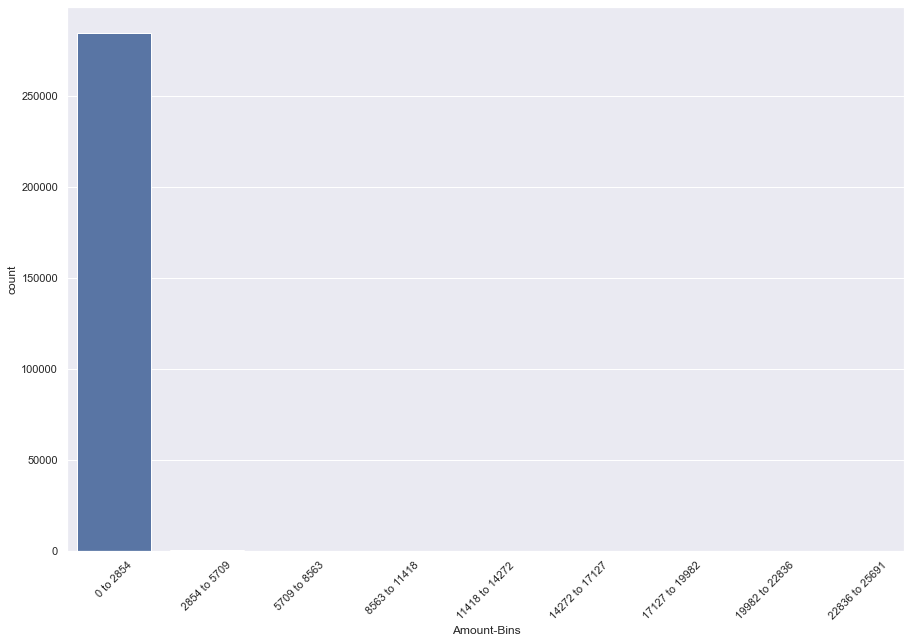

In [19]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df)
plt.xticks(rotation=45)

Since, count of values of Bins other than '0 to 2854' are difficult to view. Let's not insert the first one.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

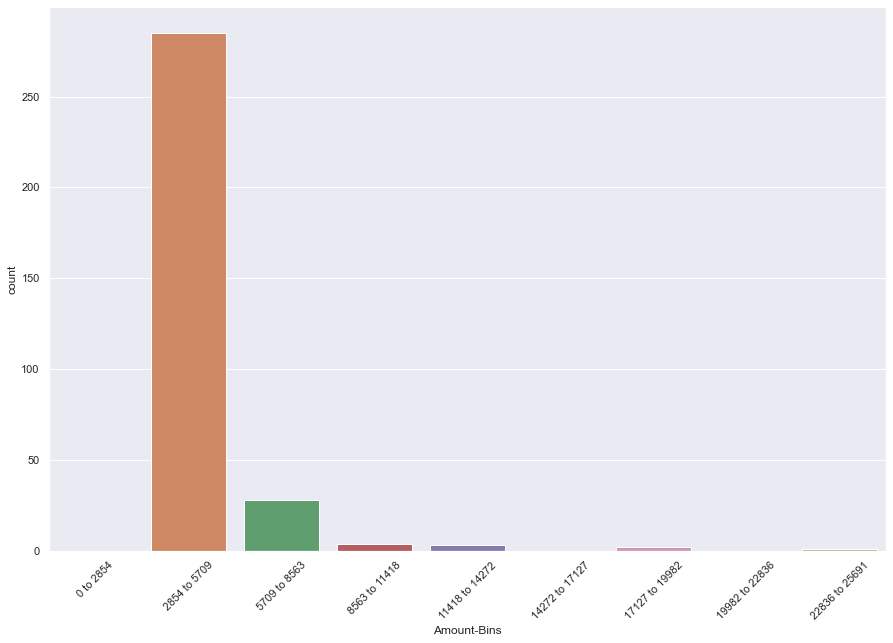

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df[~(df['Amount-Bins'] == '0 to 2854')])
plt.xticks(rotation=45)

We can see that mostly the amount is between 0 and 2854 euros.   
  
<font size = "5" > Predictive Modelling </font>  
Let's predict whether a credit card is fraud or not using machine learning.  

<font size = "5" > One-hot encoding the Amount-Bins </font>  
Since, for classification, we need to pass the data in numerical form. That's why we need to One-Hot encode the Amount-Bins column.

In [21]:
df_encoded = pd.get_dummies(data=df, columns=['Amount-Bins'])
df = df_encoded.copy()

In [22]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,1,0,0,0,0,0,0,0,0


<font size = "5"> Breaking the dataset into training and testing </font>  
First, separating the response variable from the explanatory variables.

In [23]:
X = df.drop(labels='Class', axis=1)
Y = df['Class']

X.shape, Y.shape

((284807, 39), (284807,))

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


<font size = "5"> Applying Machine Learning Algorithms </font>  
Let's apply different Machine Learning Algorithms then compare their metrics to select the most suitable ML algorithm. Algorithms to be   used are:  
  
Logistic Regression   
Support Vector Machine   
Naive Bayes   
K-Nearest Neighbors

The metrics we'll use are:    
    
Accuracy   
Precision   
Error rate    
Sensitivity   
Specificity    
F1-Score      
Recall  

<font size = "5"> LOGISTIC REGRESSION </font>

In [26]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [27]:
# Training the algorithm
lr_model.fit(xtrain, ytrain)

LogisticRegression()

In [28]:
# Predictions on training and testing data
lr_pred_train = lr_model.predict(xtrain)
lr_pred_test = lr_model.predict(xtest)

Before going further into metrics, let's first decide either Type-I or Type-II error is more important to consider.

Type-I  Error or False Positives: False Positives are the ones which are actually not fraud but the prediction said that they are fraud.
Type-II Error or False Negatives: False Negatives are the ones which are actually fraud but the system said that they aren't.

Well, we can say that Type-II Error is more significant because we don't want system to have a fraudulent credit card because that can be more dangerous.

So, for Type-II Error, We can say that recall is the important metric.

In [29]:
# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

Let's first look at the confusion matrix.

In [30]:
tn, fp, fn, tp = confusion_matrix(ytest, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,86,50
Not Fraud,35,85272


Let's draw a heatmap for the above confusion matrix.

<AxesSubplot:>

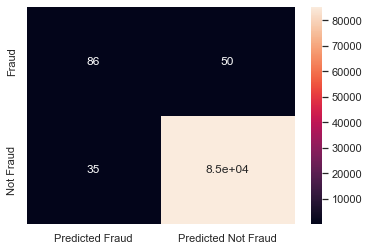

In [31]:
sns.heatmap(conf_matrix, annot=True)

Heatmap also suggests that the data is highly imbalanced.

Let's look at the accuracy score.

In [32]:
lr_accuracy = accuracy_score(ytest, lr_pred_test)
lr_accuracy

0.9990051847430451

We can see here that accuracy is great. Around 99%.

But we know that the dataset is highly unbalanced and accuracy takes into account the whole confusion matrix. So we can say that this measure is not suitable.

Let's look at precision and recall.

In [33]:
lr_precision = precision_score(ytest, lr_pred_test)
lr_precision

0.7107438016528925

Recall

In [34]:
lr_recall = recall_score(ytest, lr_pred_test)
lr_recall

0.6323529411764706

Recall is very low in case of logistic regression. However, we may try to increase it by increasing the complexity of the model.

Although, let's check the recall for training dataset to get the idea of any overfitting we may be having.

In [35]:
lr_recall_train = recall_score(ytrain, lr_pred_train)
lr_recall_train

0.6769662921348315

Well, we can see that the delta is small, only around 0.03. So, we can say that the model is not overfitting.

Let's look at the F1-Score. F1-Score may tell us that one of the precision or recall is very low.

In [36]:
from sklearn.metrics import f1_score

In [37]:
lr_f1 = f1_score(ytest, lr_pred_test)
lr_f1

0.6692607003891051

Let's look at the classification report.

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(ytest, lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.63      0.67       136

    accuracy                           1.00     85443
   macro avg       0.86      0.82      0.83     85443
weighted avg       1.00      1.00      1.00     85443



Let's look at the ROC curve.   
  
Now, for the ROC Curve, we need the probabilites of Fraud happening (which is the probability of occurance of 1)

In [40]:
lr_pred_test_prob = lr_model.predict_proba(xtest)[:, 1]

Now, to draw the ROC Curve, we need to have True Positive Rate and False Positive Rate.

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

In [42]:
fpr, tpr, threshold = roc_curve(ytest, lr_pred_test_prob)

Also, let's get the auc score.

In [43]:
lr_auc = roc_auc_score(ytest, lr_pred_test_prob)
lr_auc

0.9341739075270701

Now, let's define a function to plot the roc curve.

In [44]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

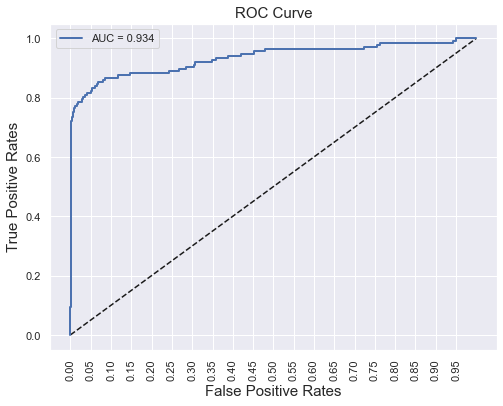

In [45]:
#Plotting ROC Curve.
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

AUC is quite good. i.e. 0.936. Based on the data being highly imbalanced, we'll only check the AUC metric in later algorithms.

<font size = "5"> Model Complexity </font>    
Let's try to train the Logistic Regression models on the 2nd degree of polynomials. Not going further 2nd degree because features are already too   much. Otherwise, computer gives the MemoryError.  

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
# Getting the polynomial features
poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.fit_transform(xtest)

# Training the model
model = LogisticRegression()
model.fit(xtrain_poly, ytrain)

# Getting the probabilities
train_prob = model.predict_proba(xtrain_poly)[:, 1]
test_prob = model.predict_proba(xtest_poly)[:, 1]

# Computing the ROC Score
roc_auc_score(ytrain, train_prob), roc_auc_score(ytest, test_prob)

(0.9122902616641463, 0.9238498202685249)

Plotting ROC Curve for the Test data

In [48]:
fpr_poly, tpr_poly, threshold_poly = roc_curve(ytest, test_prob)

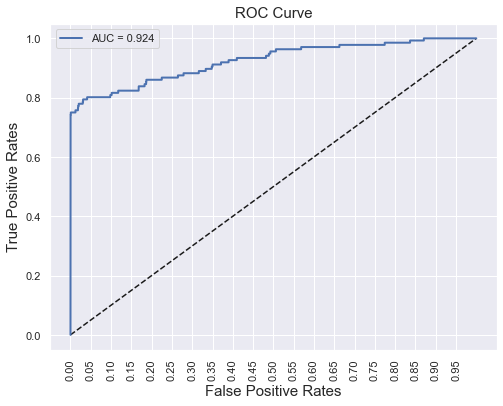

In [49]:
plot_roc_curve(fpr=fpr_poly, tpr=tpr_poly, label='AUC = %.3f' %  roc_auc_score(ytest, test_prob))


First degree is better in Logistic Regression case which gives 0.965 AUC Score.   
Let's also check the Recall in case of model complexity.

In [50]:
recall_score(ytest, model.predict(xtest_poly))

0.75

Recall has increased when the model is made complex.

<font size = "5"> Support Vector Machine </font>  
Let's try the Support Vector Machine algorithm.

Now, for support vector machines, we need to train the model after scaling the features. Let's first do that.

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
mms = MinMaxScaler()

In [53]:
# Let's first check the head of the explanatory variables which are to be scaled.
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,2.69,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,123.50,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,69.99,1,0,0,0,0,0,0,0,0


In [54]:
X_scaled = mms.fit_transform(X)

In [55]:
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.005824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.000105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.014739,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.004807,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.002724,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, let's train test split on the scaled data.

In [56]:
xtrainS, xtestS, ytrainS, ytestS = train_test_split(
    X_scaled, Y, random_state=42, test_size=0.30, shuffle=True)

In [57]:
print(xtrainS.shape, ytrainS.shape)
print(xtestS.shape, ytestS.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


In [58]:
from sklearn.svm import SVC

In [59]:
svc_model = SVC(kernel='linear', probability=True)

In [60]:
svc_model.fit(xtrainS, ytrainS)

SVC(kernel='linear', probability=True)

In [61]:
svc_pred = svc_model.predict(xtestS)

In [62]:
tn_svc, fp_svc, fn_svc, tp_svc= confusion_matrix(ytestS, svc_pred).ravel()


In [63]:
conf_matrix_svc = pd.DataFrame(
    {
        'Predicted Fraud': [tp_svc, fp_svc],
        'Predicted Not Fraud': [fn_svc, tn_svc]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix_svc

,Predicted Fraud,Predicted Not Fraud
Fraud,109,27
Not Fraud,22,85285


<AxesSubplot:>

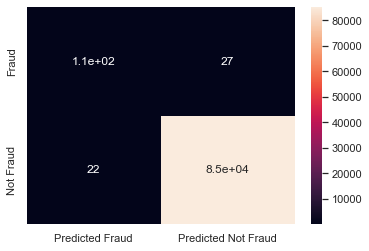

In [64]:
sns.heatmap(conf_matrix_svc, annot=True)

In [65]:
print(classification_report(ytestS, svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.80      0.82       136

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



Let's first check the recall score.

In [66]:
svc_recall = recall_score(ytestS, svc_pred)
svc_recall

0.8014705882352942

Recall quite increased in case of SVC.

In [67]:
svc_pred_prob = svc_model.predict_proba(xtestS)[:, 1]

Now, let's draw the ROC Curve.

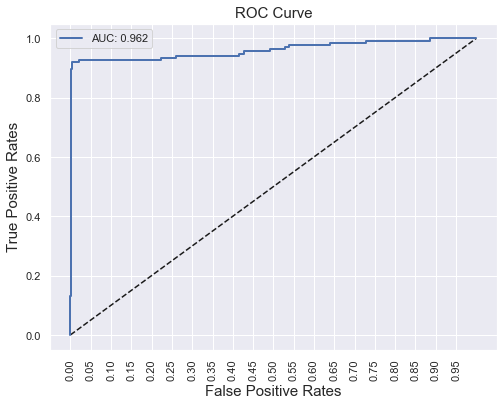

In [68]:
# First, getting the auc score
svc_auc = roc_auc_score(ytestS, svc_pred_prob)

# Now, let's get the fpr and tpr
fpr, tpr, threshold = roc_curve(ytestS, svc_pred_prob)

# Now, let's draw the curve
plot_roc_curve(fpr, tpr, 'AUC: %.3f' % svc_auc)


The score AUC Score SVC gave is also pretty great. But it's still less than Logistic Regression Model. But the Recall increased significantly.

<font size = "4"> Tuning the Hyper-parameters </font>     
Now, let's tune some of the hyper-parameters of SVM and then compare the scores.

In [69]:
# For Kernel = rbf
tuned_rbf = {'kernel': ['rbf'], 'gamma': [
    1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

# For kernel = sigmoid
tuned_sigmoid = {'kernel': ['sigmoid'], 'gamma': [
    1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

# For kernel = linear
tuned_linear = {'kernel': ['linear'], 'C': [
    0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
rs_rbf = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_rbf, n_iter=500, n_jobs=4, scoring='roc_auc')

rs_sigmoid = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_sigmoid, n_iter=500, n_jobs=4, scoring='roc_auc')

rs_linear = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_linear, n_iter=500, n_jobs=4, scoring='roc_auc')

For kernel rbf:

In [72]:
rs_rbf.fit(xtrainS[::10], ytrainS[::10])

RandomizedSearchCV(estimator=SVC(probability=True), n_iter=500, n_jobs=4,
                   param_distributions={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100,
                                              1000],
                                        'gamma': [0.01, 0.001, 0.0001, 1e-05],
                                        'kernel': ['rbf']},
                   scoring='roc_auc')

In [73]:
rs_rbf.best_estimator_

SVC(C=1000, gamma=0.01, probability=True)

In [74]:
svc_rbf_best_est = rs_rbf.best_estimator_

Let's fit the model on the best rbf estimator.

In [75]:
svc_rbf_best_est.fit(xtrainS[::10], ytrainS[::10])

SVC(C=1000, gamma=0.01, probability=True)

In [76]:
svc_rbf_best_est_pred = svc_rbf_best_est.predict(xtestS[::10])

In [77]:
svc_rbf_best_est_pred_proba = svc_rbf_best_est.predict_proba(xtestS[::10])[:, 1]

Getting the AUC Score.

In [78]:
svc_rbf_auc = roc_auc_score(ytestS[::10], svc_rbf_best_est_pred_proba)

Getting the Recall too.

In [79]:
svc_rbf_recall = recall_score(ytestS[::10], svc_rbf_best_est_pred)
svc_rbf_recall

0.9473684210526315

We can see that in this model, both recall and ROC Score are great. Let's draw the ROC Curve.

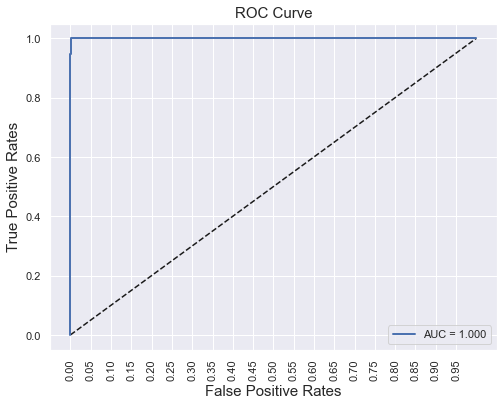

In [80]:
fpr, tpr, threshold = roc_curve(ytestS[::10], svc_rbf_best_est_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_rbf_auc)

Now, for kernel sigmoid.

In [81]:
rs_sigmoid.fit(xtrainS[::10], ytrainS[::10])

RandomizedSearchCV(estimator=SVC(probability=True), n_iter=500, n_jobs=4,
                   param_distributions={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100,
                                              1000],
                                        'gamma': [0.01, 0.001, 0.0001, 1e-05],
                                        'kernel': ['sigmoid']},
                   scoring='roc_auc')

In [82]:
svc_sigmoid = rs_sigmoid.best_estimator_

In [83]:
svc_sigmoid.fit(xtrainS[::10], ytrainS[::10])

SVC(C=1000, gamma=0.01, kernel='sigmoid', probability=True)

In [84]:
svc_sigmoid_pred = svc_sigmoid.predict(xtestS[::10])
svc_sigmoid_pred_proba = svc_sigmoid.predict_proba(xtestS[::10])[:, 1]

AUC:

In [85]:
svc_sigmoid_auc = roc_auc_score(ytestS[::10], svc_sigmoid_pred_proba)
svc_sigmoid_auc

0.9999938269318616

Recall:

In [86]:
svc_sigmoid_recall = recall_score(ytestS[::10], svc_sigmoid_pred)
svc_sigmoid_recall

0.9473684210526315

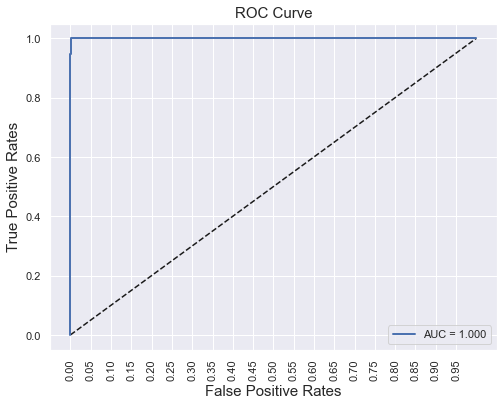

In [87]:
fpr, tpr, threshold = roc_curve(ytestS[::10], svc_sigmoid_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_sigmoid_auc)

Let's check for Linear kernel.

In [88]:
rs_linear.fit(xtrainS[::5], ytrainS[::5])

RandomizedSearchCV(estimator=SVC(probability=True), n_iter=500, n_jobs=4,
                   param_distributions={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100,
                                              1000],
                                        'kernel': ['linear']},
                   scoring='roc_auc')

In [89]:
svc_linear = rs_linear.best_estimator_

In [90]:
svc_linear.fit(xtrainS[::5], ytrainS[::5])

SVC(C=25, kernel='linear', probability=True)

Getting the predictions and probabilities.

In [91]:
svc_linear_pred = svc_linear.predict(xtestS[::5])
svc_linear_pred_proba = svc_linear.predict_proba(xtestS[::5])[:, 1]

AUC and ROC Curve

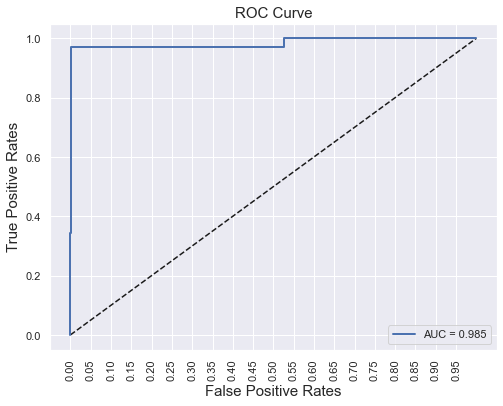

In [92]:
svc_linear_auc = roc_auc_score(ytestS[::5], svc_linear_pred_proba)

fpr, tpr, threshold = roc_curve(ytestS[::5], svc_linear_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_linear_auc)

Let's check the recall too.

In [93]:
svc_linear_recall = recall_score(ytestS[::5], svc_linear_pred)
svc_linear_recall

0.8571428571428571

AUC is great in case of a linear kernel however it's less than that of rbf kernel. And its recall decreased quite a bit.

<font size = "5" > Naive Bayes Algorithm </font>   
Now, let's try the famous Naive Bayes Machine Learning Algorithm.

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
nb = GaussianNB()

Let's first train the algorithm on the default settings.

In [96]:
nb.fit(xtrain, ytrain)

GaussianNB()

In [97]:
nb_pred = nb.predict(xtest)
nb_pred_proba = nb.predict_proba(xtest)[:, 1]

In [98]:
nb_auc = roc_auc_score(ytest, nb_pred)

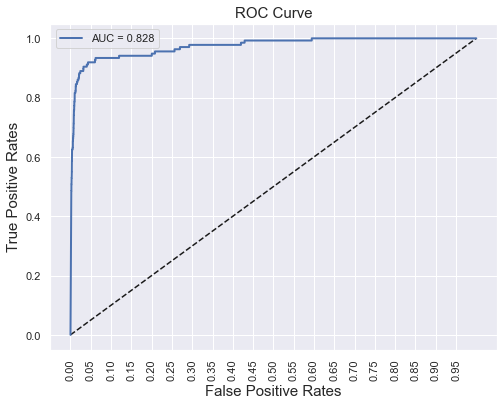

In [99]:
fpr, tpr, threshold = roc_curve(ytestS, nb_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % nb_auc)

In [100]:
nb_recall = recall_score(ytest, nb_pred)
nb_recall

0.6617647058823529

Conclusion: Naive Bayes didn't perform well as compared to the other ones.

In [101]:
from sklearn import metrics
svm_accuracy = metrics.accuracy_score(ytestS, svc_pred)
svm_precision = metrics.precision_score(ytestS, svc_pred)
svm_f1 = f1_score(ytestS, svc_pred)

In [102]:
nb_accuracy = metrics.accuracy_score(ytest, nb_pred)
nb_precision = metrics.precision_score(ytest, nb_pred)
nb_f1 = f1_score(ytest, nb_pred)

In [103]:
print(lr_recall,lr_accuracy,lr_precision,lr_f1)

0.6323529411764706 0.9990051847430451 0.7107438016528925 0.6692607003891051


In [104]:
print(svc_recall,svm_accuracy,svm_precision,svm_f1)

0.8014705882352942 0.9994265182636377 0.8320610687022901 0.8164794007490637


In [105]:
print(nb_recall,nb_accuracy,nb_precision,nb_f1)

0.6617647058823529 0.9930479969102208 0.14106583072100312 0.2325581395348837


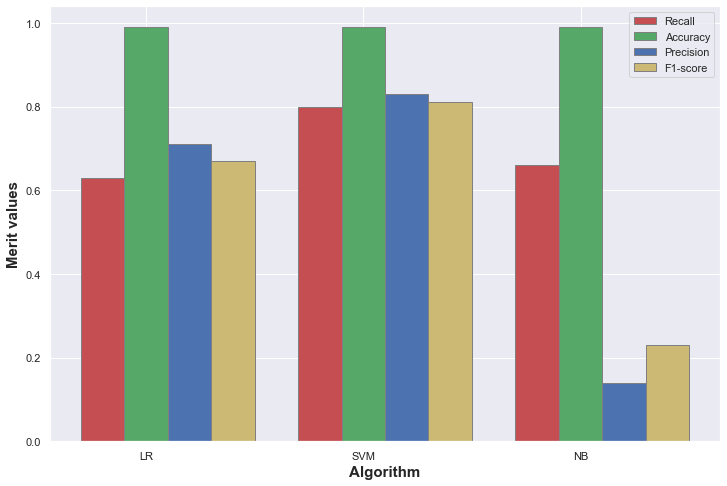

In [106]:
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
rec = [0.63, 0.80, 0.66]
acc = [0.99, 0.99, 0.99]
pre = [0.71, 0.83, 0.14]
fs1 = [0.67, 0.81, 0.23]
 
# Set position of bar on X axis
br1 = np.arange(len(rec))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, rec, color ='r', width = barWidth,
        edgecolor ='grey', label ='Recall')
plt.bar(br2, acc, color ='g', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br3, pre, color ='b', width = barWidth,
        edgecolor ='grey', label ='Precision')
plt.bar(br4, fs1, color ='y', width = barWidth,
        edgecolor ='grey', label ='F1-score')
 
# Adding Xticks
plt.xlabel('Algorithm', fontweight ='bold', fontsize = 15)
plt.ylabel('Merit values', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(rec))],
        ['LR', 'SVM', 'NB'])
 
plt.legend()
plt.show()